In [1]:
from pam import read

In [2]:
pop = read.read_matsim('../tests/test_data/test_matsim_plans.xml')

You can generate `geopandas.GeoDataFrames` for `Population`'s, `Household`'s or `Person`'s travel. the `route_id`, `service_id` and `network_route` refer to the network used for running the simulation. `GeoDataFrame`s are very useful, they let you to generate geojsons simply and quickly, which you can then load up in kepler.

```
gdf.to_file('path/to/file/gdf.geojson'), driver='GeoJSON')
```
note that to use this geojson with kepler you will need the geometry to be in `'epsg:4326'`. You can do this with the method below.

In [3]:
pop.build_travel_geodataframe(from_epsg='epsg:27700', to_epsg='epsg:4326').head()

,d_stop,end_location,end_time,geometry,mode,network_route,o_stop,purp,route_id,seq,service_id,start_location,start_time,pid,hid
0,None,"(529652.0, 183897.0)",1900-01-01 07:24:52,"LINESTRING (-0.33843 51.58109, -0.13193 51.53909)",pt,None,None,None,None,1.0,None,"(515226.0, 188222.0)",1900-01-01 07:24:52,census_0,census_0
1,None,"(515226.0, 188222.0)",1900-01-01 14:50:52,"LINESTRING (-0.13193 51.53909, -0.33843 51.58109)",pt,None,None,None,None,2.0,None,"(529652.0, 183897.0)",1900-01-01 14:50:52,census_0,census_0
2,None,"(550873.0, 187629.0)",1900-01-01 08:38:15,"LINESTRING (0.12334 51.53717, 0.17543 51.56736)",transit_walk,None,None,None,None,1.0,None,"(547360.0, 184166.0)",1900-01-01 06:30:00,census_1,census_1
3,None,"(551390.0, 188476.0)",1900-01-01 20:55:49,"LINESTRING (0.17543 51.56736, 0.18325 51.57483)",transit_walk,None,None,None,None,2.0,None,"(550873.0, 187629.0)",1900-01-01 20:30:00,census_1,census_1
4,9100UPMNSP6.link:302438,"(556131.0, 186870.0)",1900-01-01 21:19:59,"LINESTRING (0.18325 51.57483, 0.25090 51.55911)",pt,PT1===9100ROMFORD.link:25821===25239===VJ307b9...,9100ROMFORD.link:25821,None,VJ307b99b535bf55bc9d62b5475e5edf0d37176bcf,3.0,25239,"(551390.0, 188476.0)",1900-01-01 20:55:49,census_1,census_1


You can also plot travel using plotly. You will need a mapbox token, which you can get here: https://docs.mapbox.com/help/how-mapbox-works/access-tokens/. Be careful not to commit your token in the repo.

In [4]:
mapbox_access_token='token'

You need to specify the coordinate system to plot it on a map. By default the plot will colour by mode:

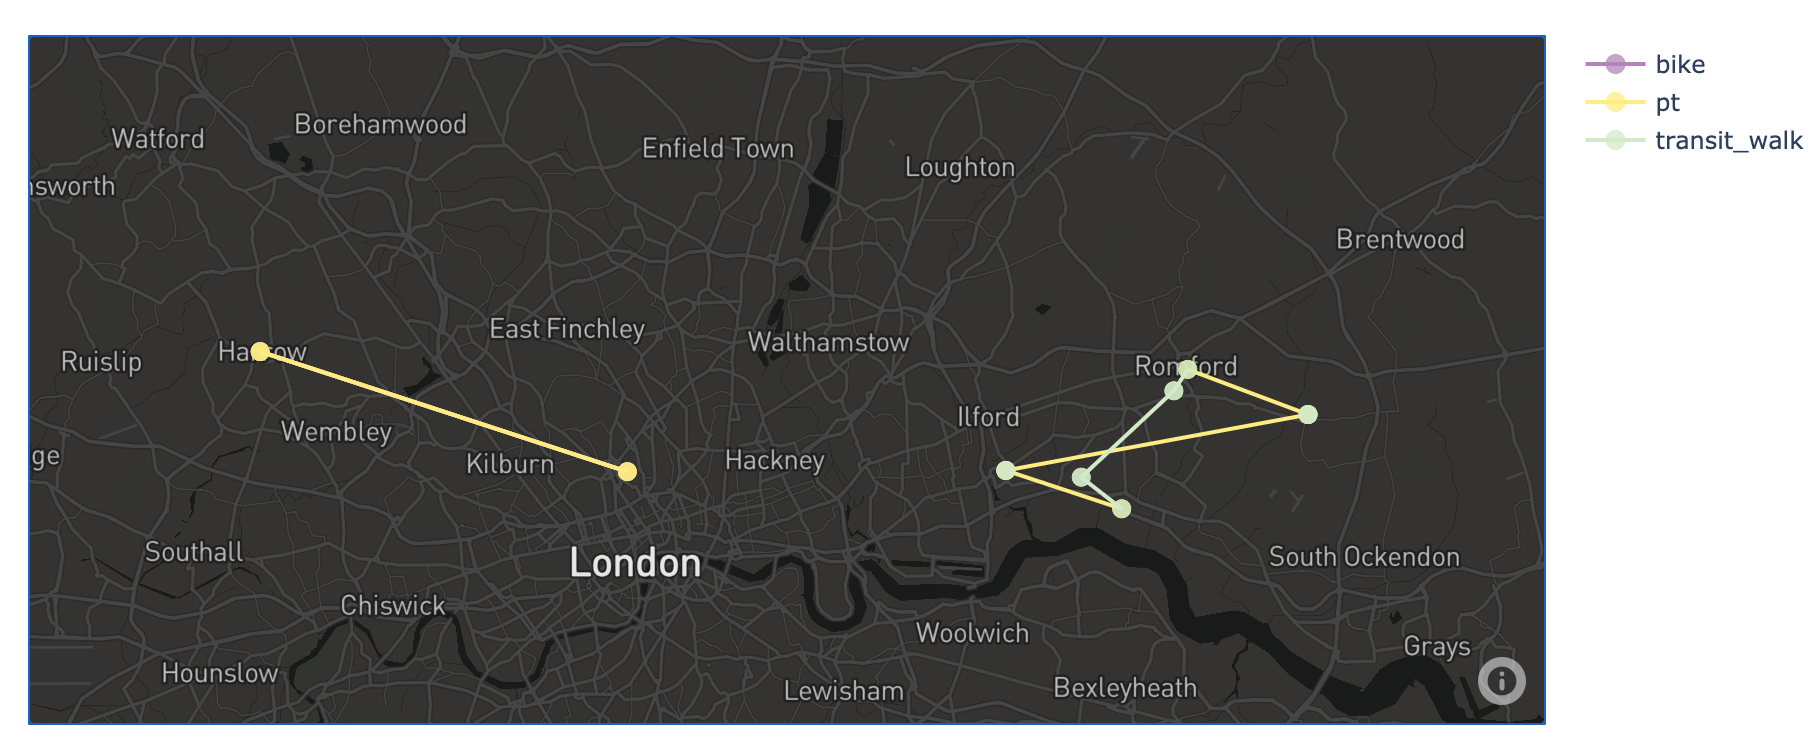

You can also colour by any column you see in the `GeoDataFrame` (see above). E.g. to colour by agent id (`pid`)

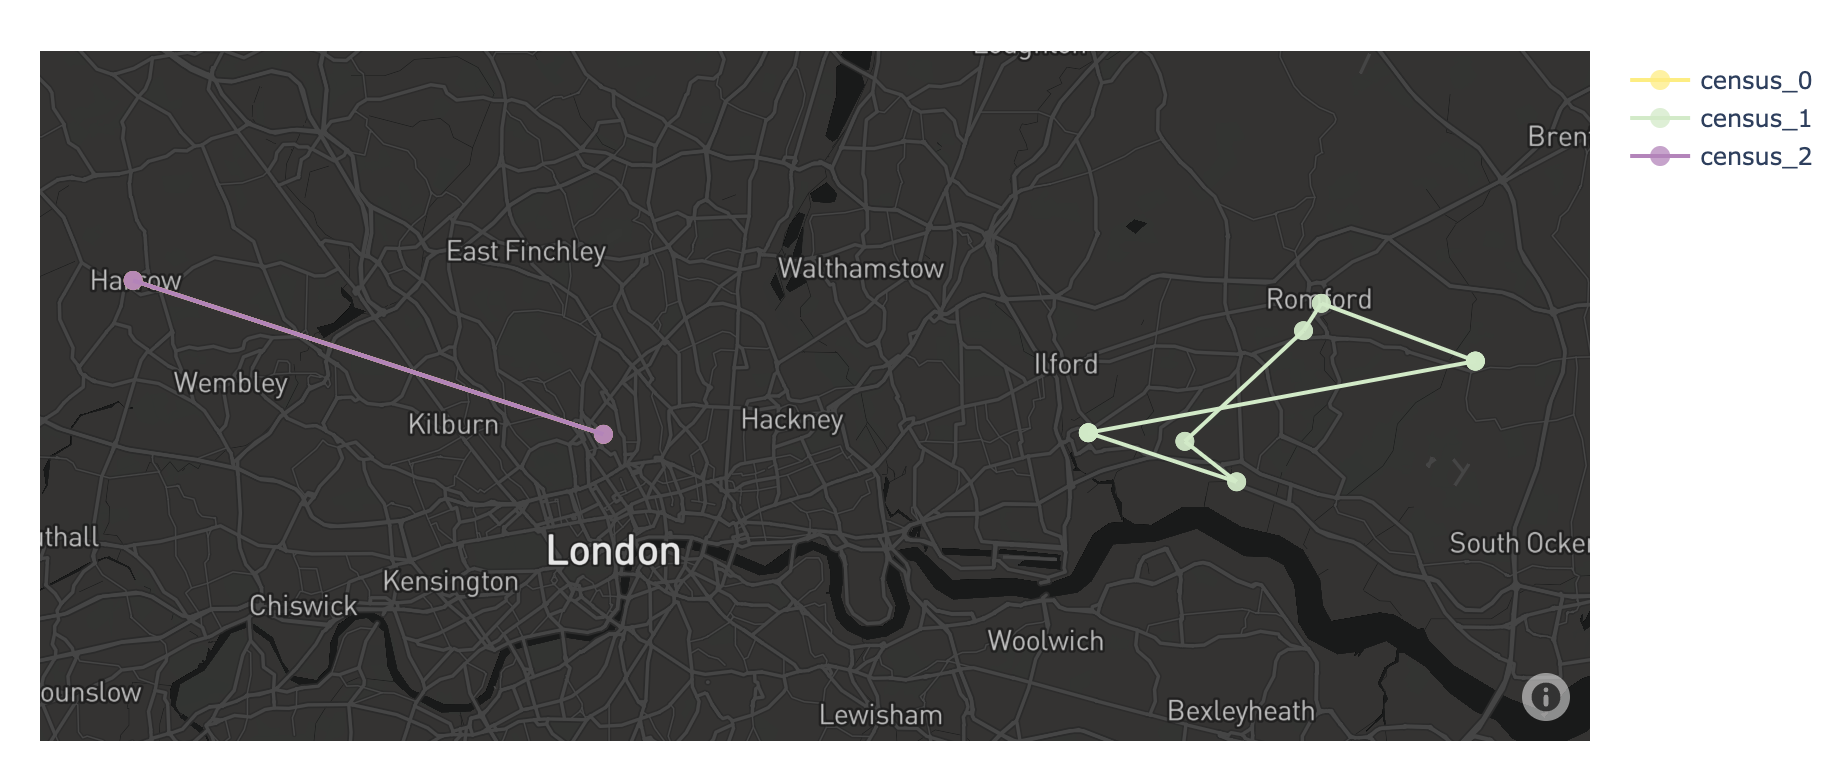

You can also separate the traces using `groupby` variable:

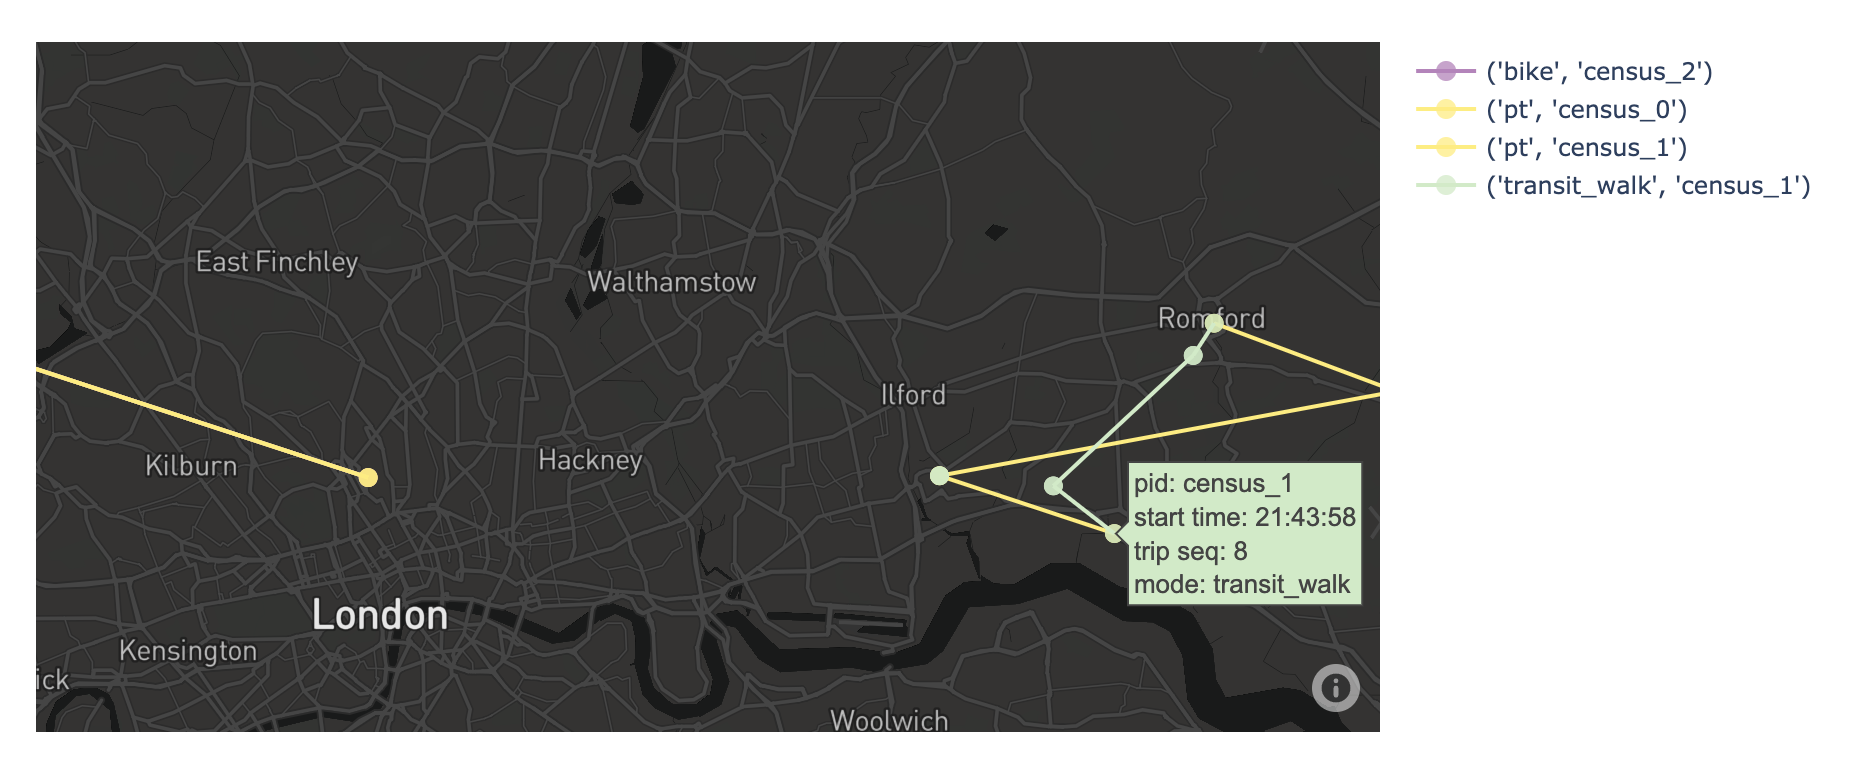